In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import pandas as pd
import seaborn as sbn
import torch
import copy
import random
import importlib

import FullRankRNN as rnn
import Reinforce as rln

In [2]:
v1s = np.array([3])
v2s = np.array([1])
p1s = np.array([0.25])
p2s = np.array([0.25])

reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network.pt", 
                          name_load_critic="models/RL_critic_network.pt",
                          v1s=v1s, v2s=v2s, p1s=p1s, p2s=p2s)

In [3]:
iterations = 100 
observations, rewards, actions, log_action_probs,\
entropies, values, trial_begins, errors = reinforce.experience(iterations)
print(len(errors), errors+1)

iteration 100
0 []


findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


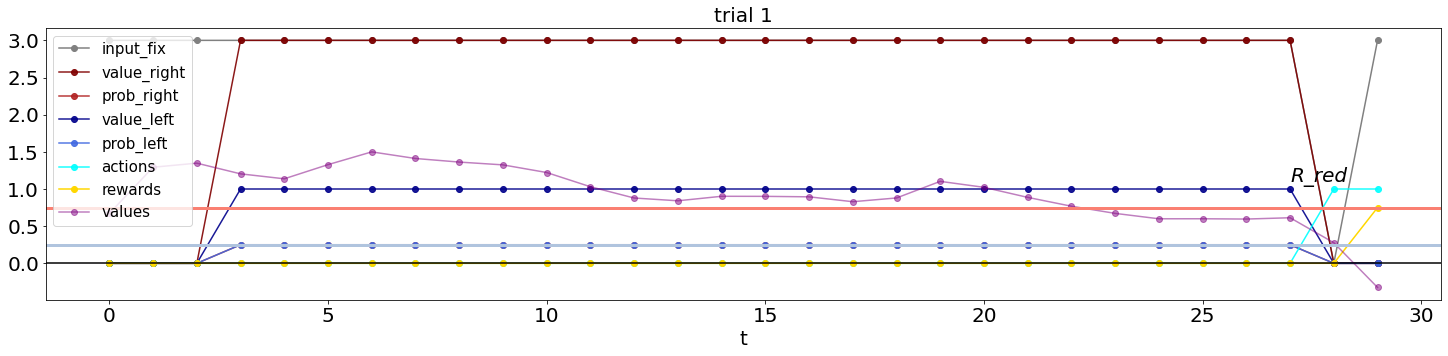

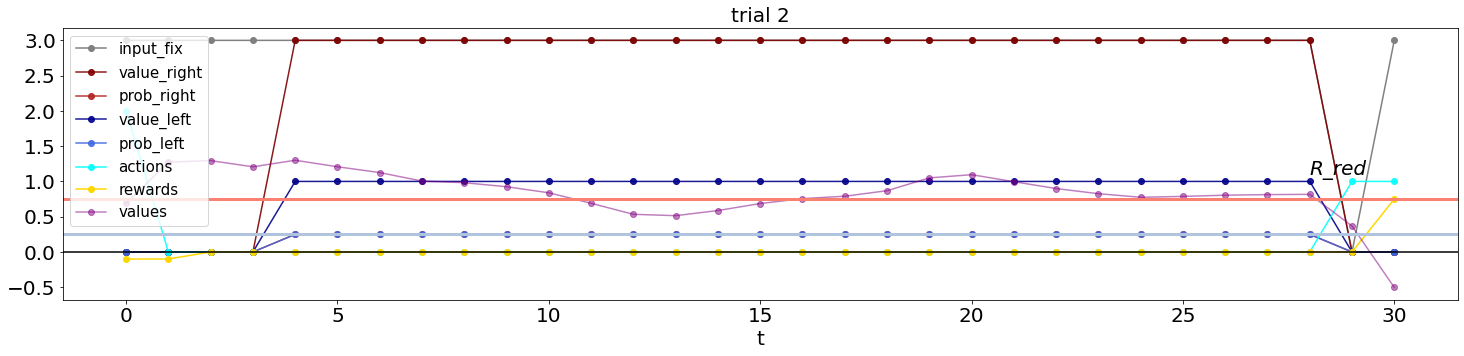

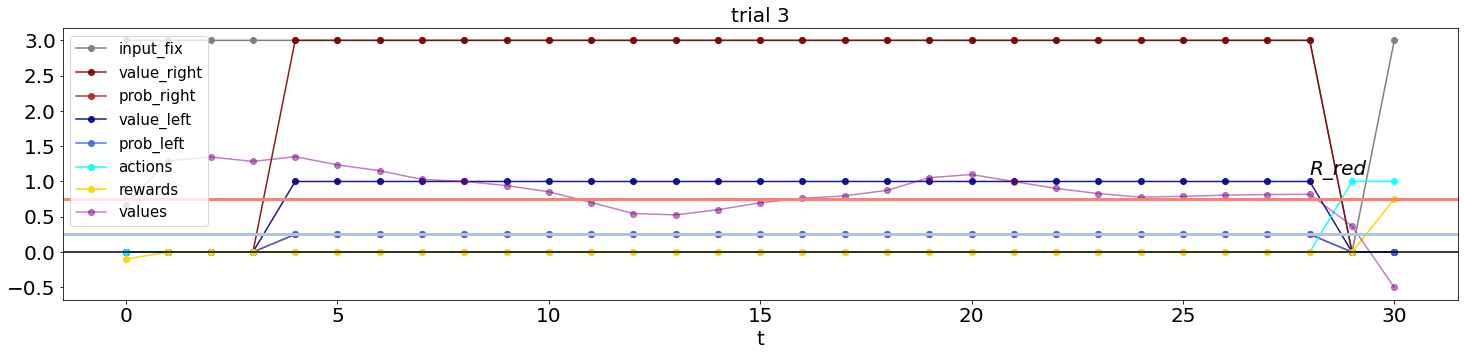

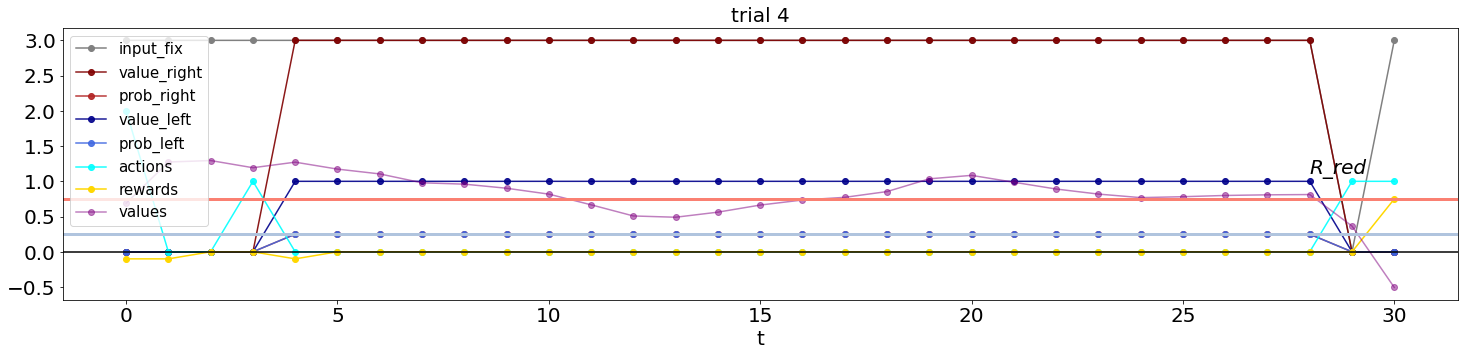

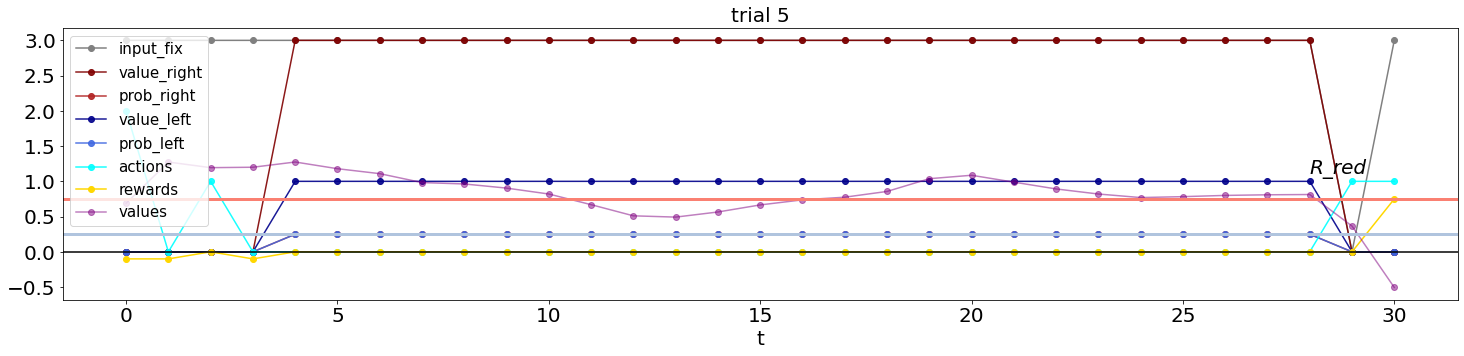

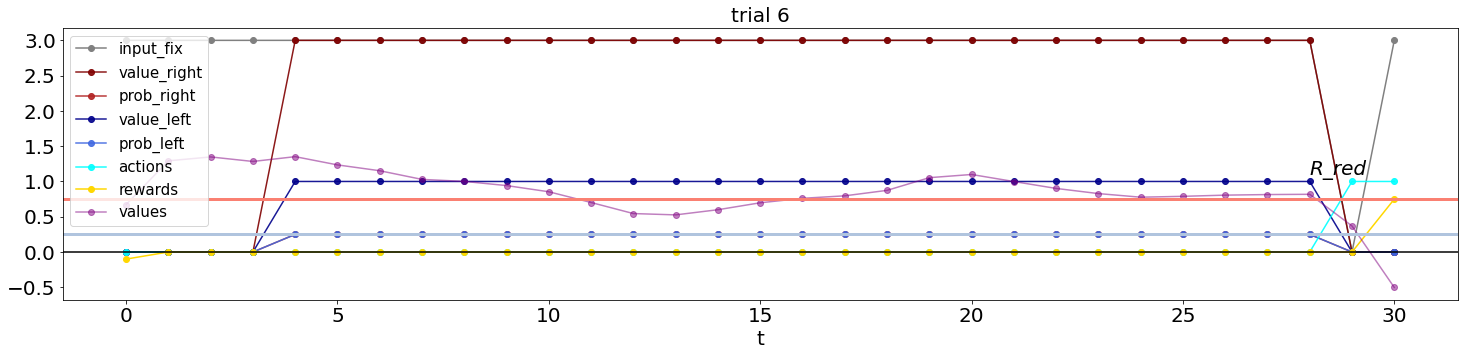

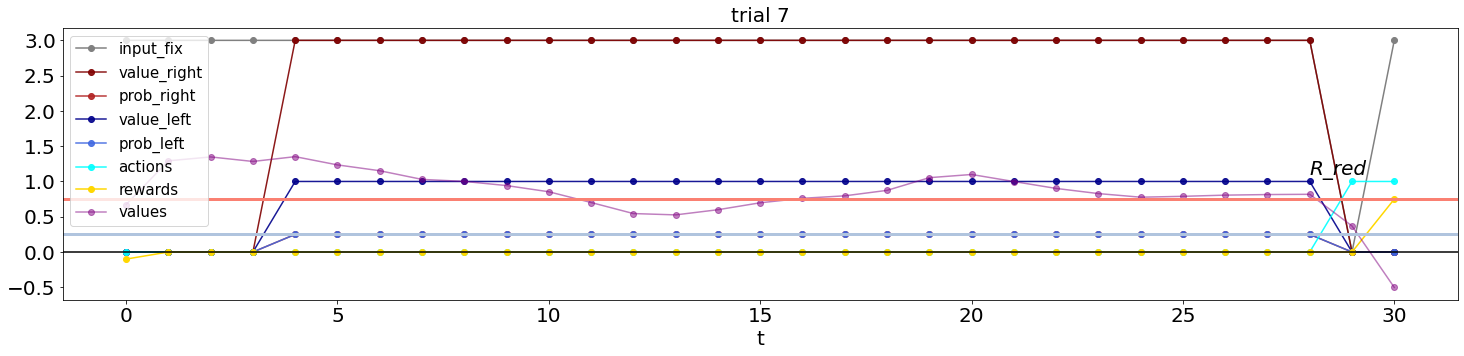

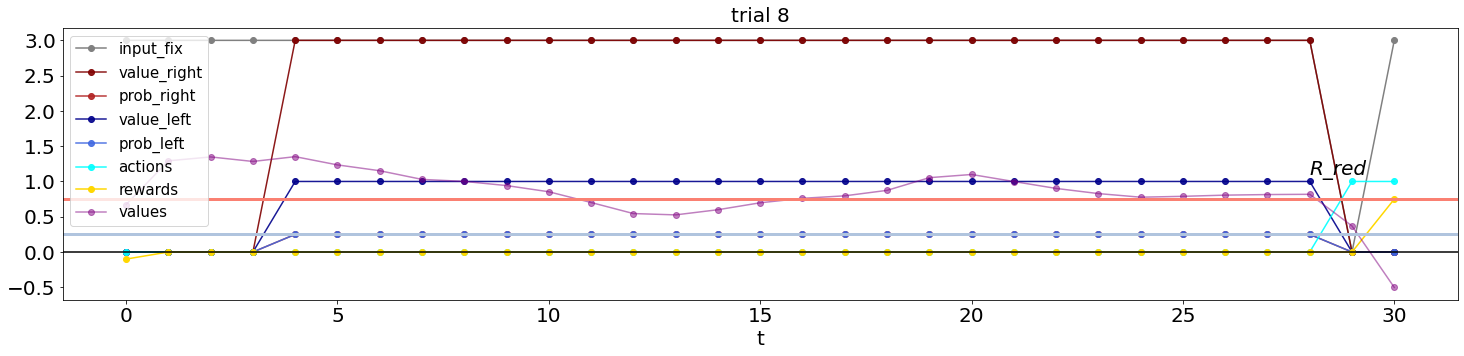

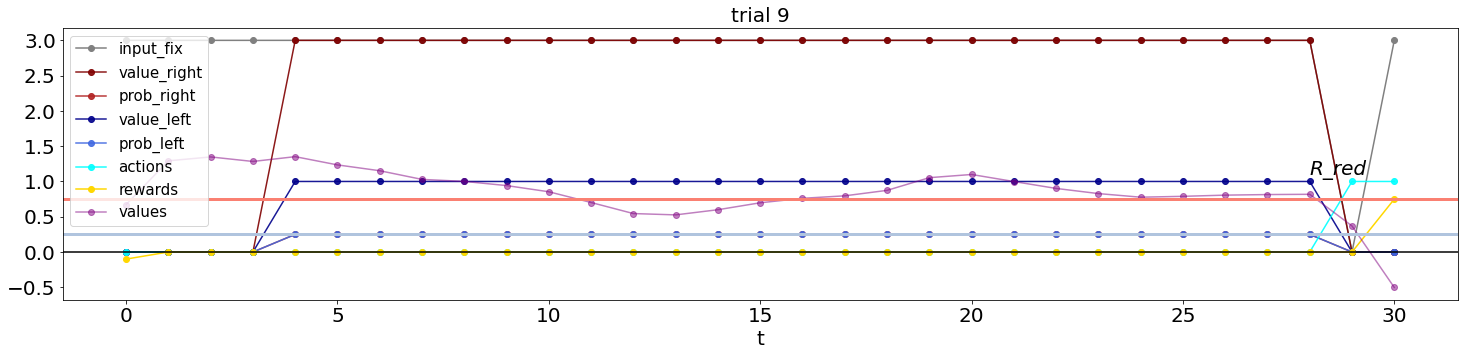

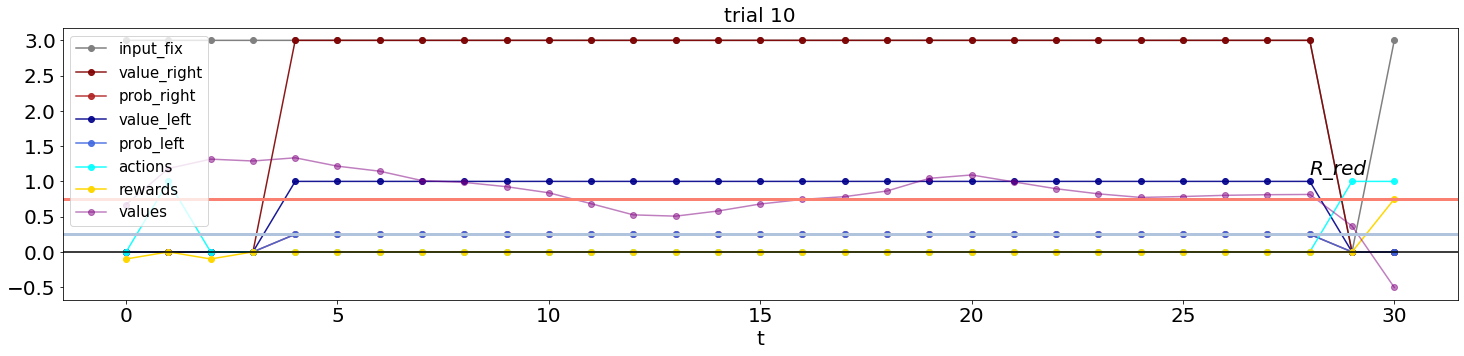

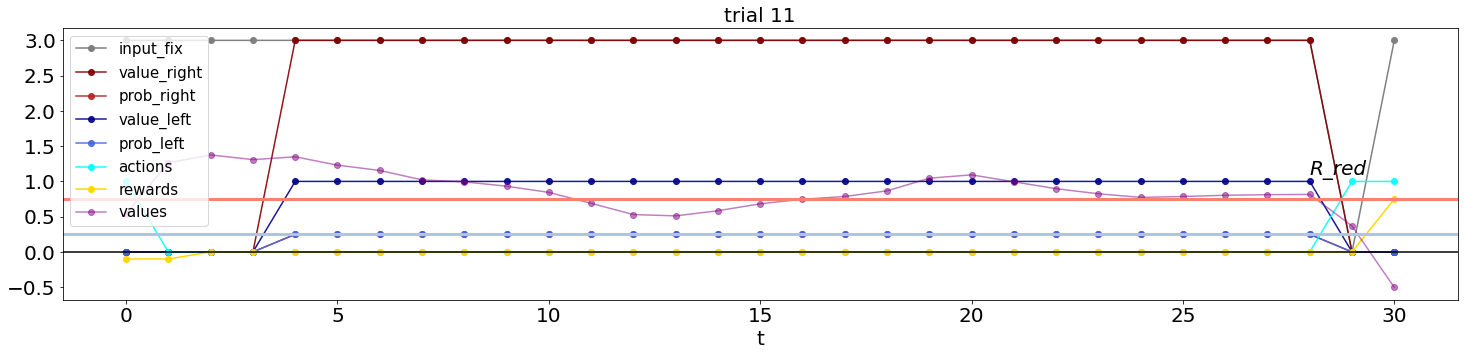

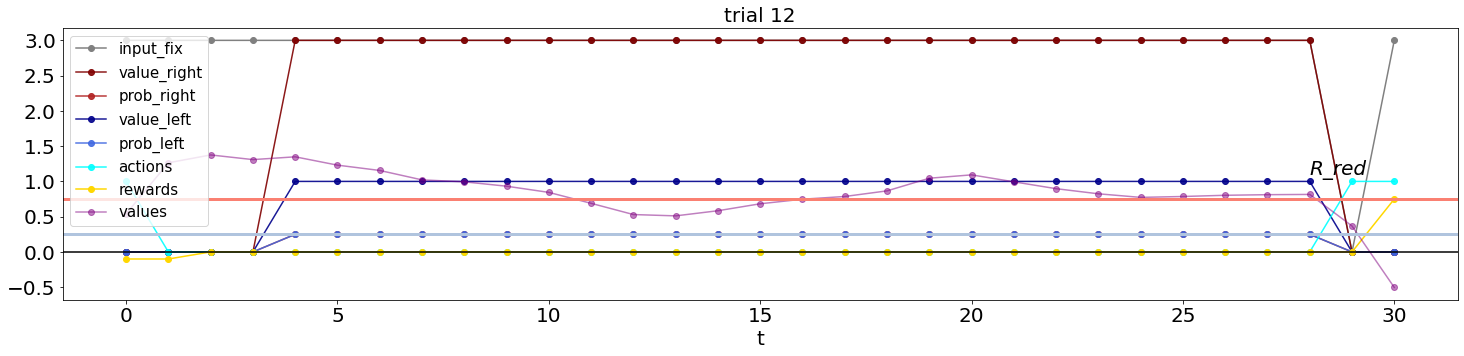

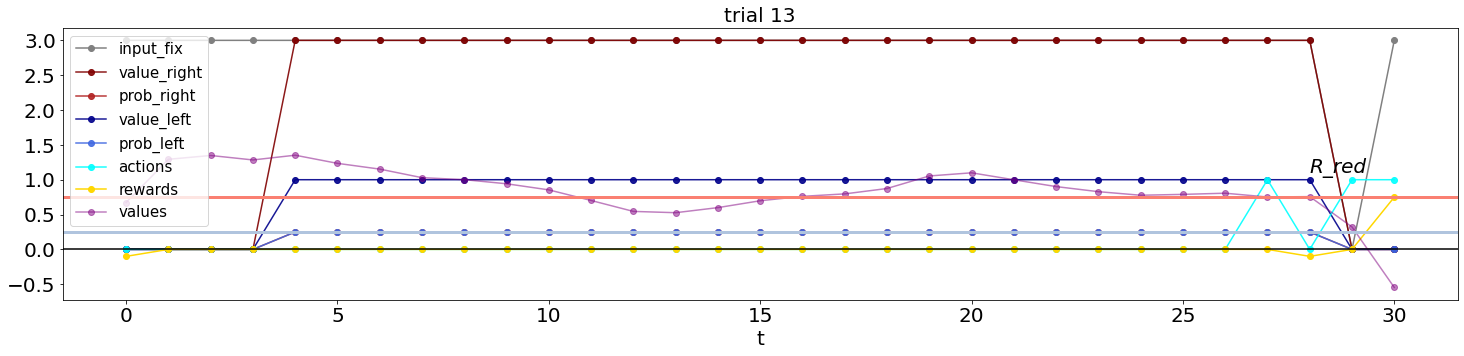

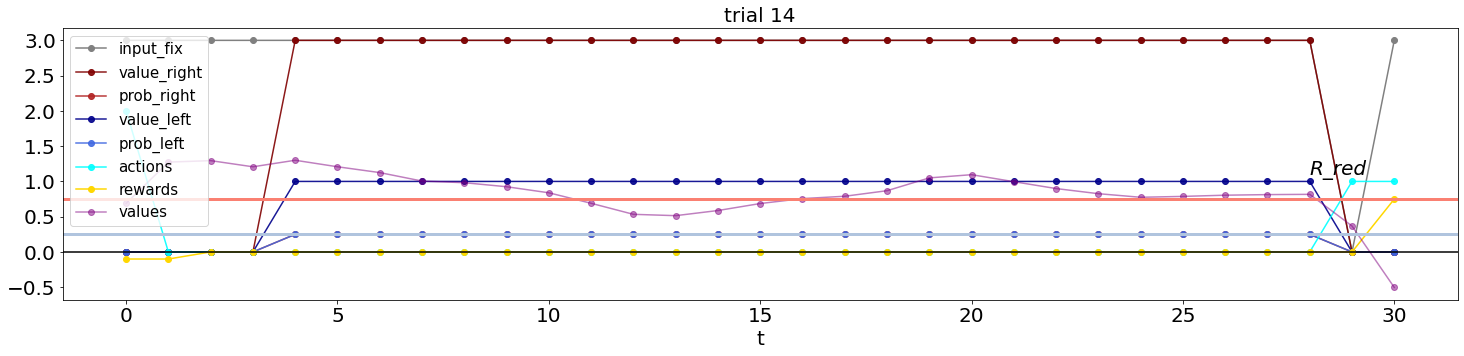

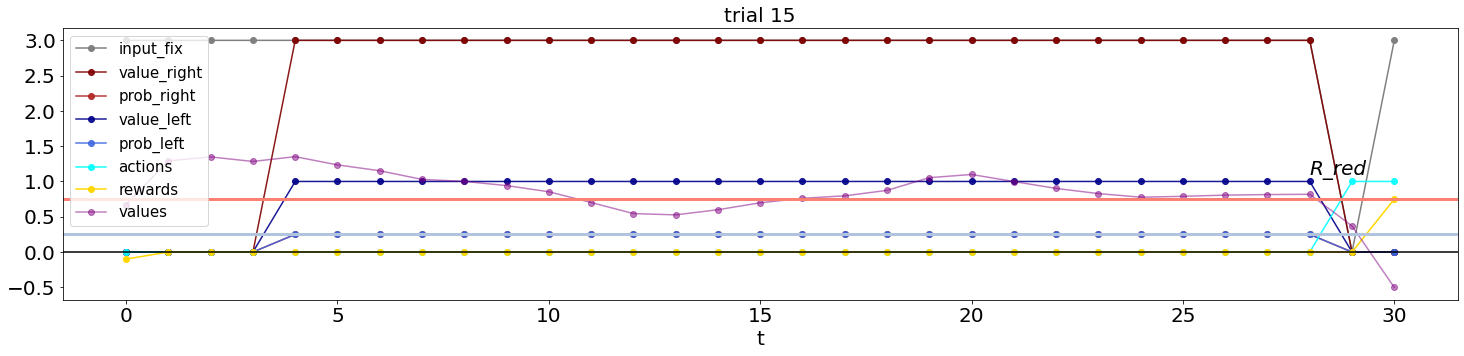

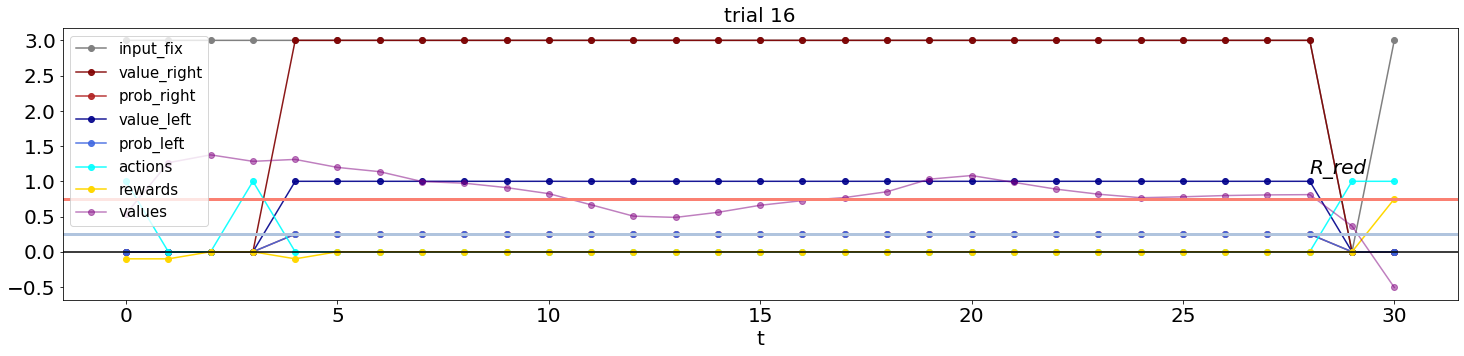

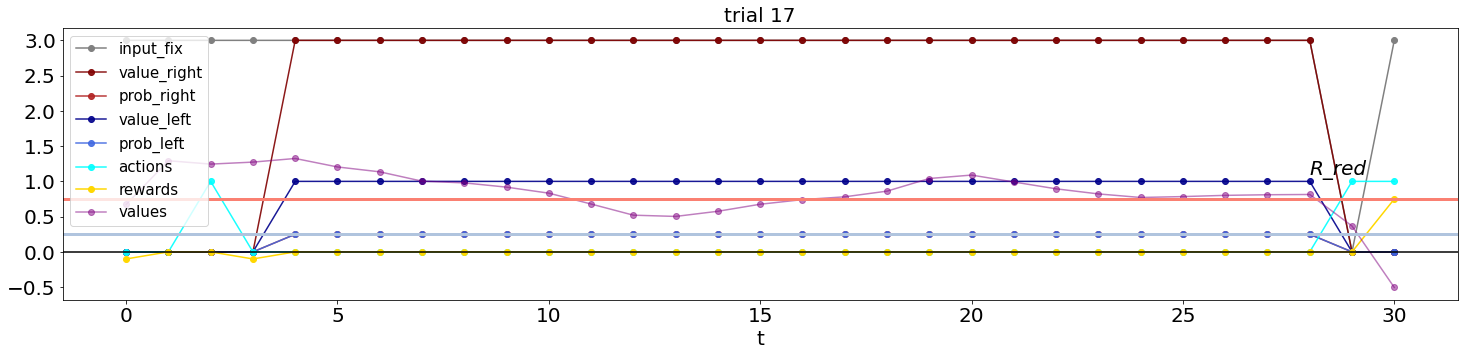

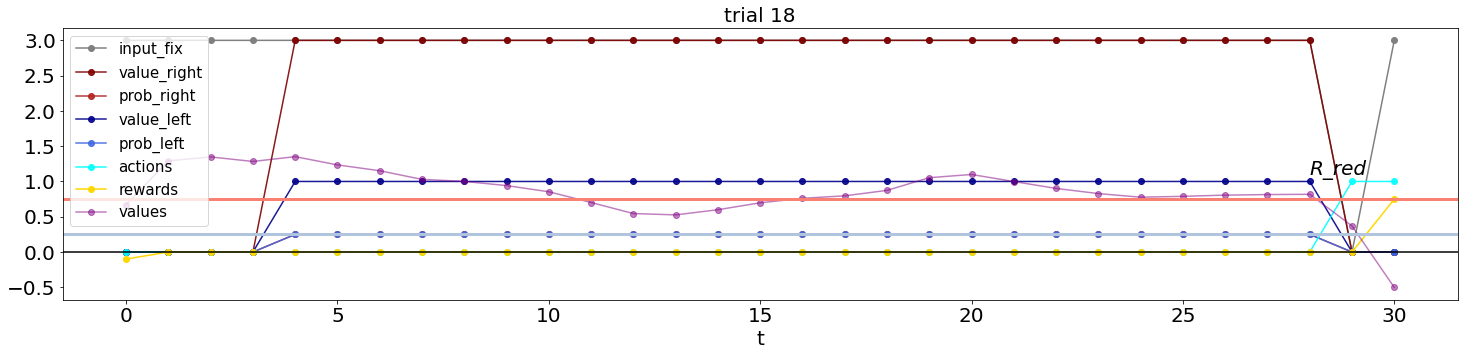

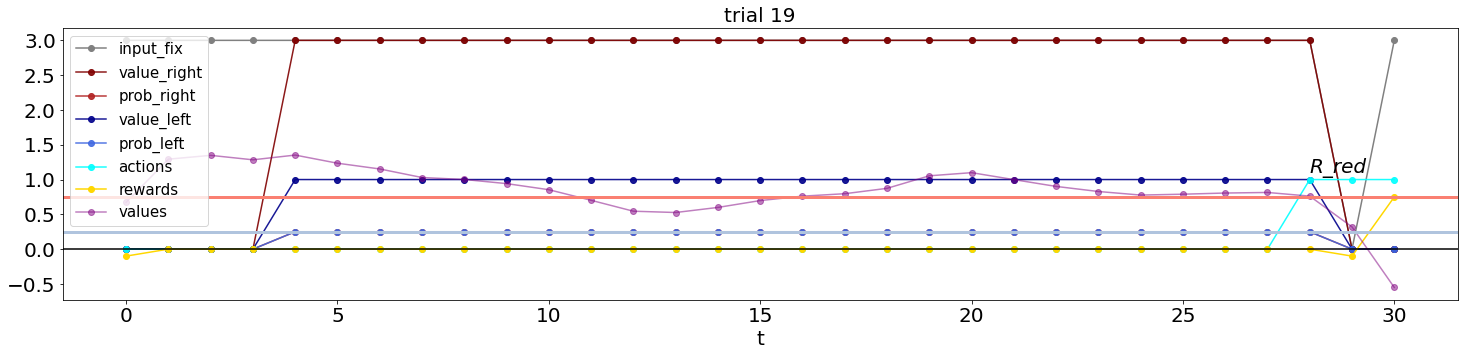

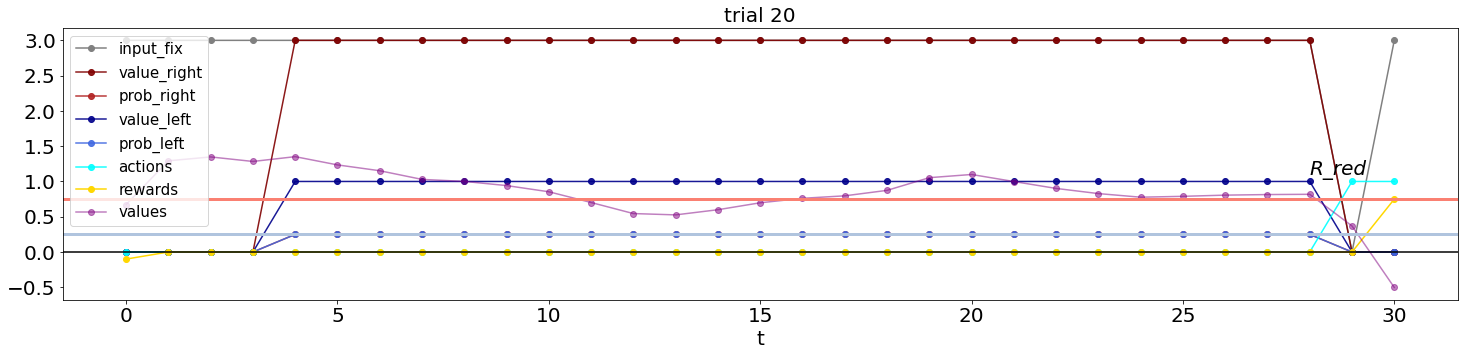

In [4]:
obs = np.asarray(observations).T
length = 0
for i in range(20):

    plt.figure(figsize=(25,5))

    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])

    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="value_right", color="maroon", alpha=0.9)
    plt.plot(obs[2][start:stop], "-o", label="prob_right", color="firebrick", alpha=0.9)
    plt.plot(obs[3][start:stop], "-o", label="value_left", color="darkblue", alpha=0.9)
    plt.plot(obs[4][start:stop], "-o", label="prob_left", color="royalblue", alpha=0.9)
    plt.plot(actions[start:stop], "-o", label="actions", color="cyan", alpha=0.9)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="gold", alpha=1)
    #plt.plot(cum_rho[start:stop], "-o", label="cum_rho", color="cyan", alpha=0.5)
    plt.plot(values.clone().detach().numpy()[start:stop], "-o", label="values", color="purple", alpha=0.5)
    #plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    plt.axhline(0, color="black")
    plt.axhline(obs[1][start+10]*obs[2][start+10], color="salmon", linewidth=3)
    plt.axhline(obs[3][start+10]*obs[4][start+10], color="lightsteelblue", linewidth=3)
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    if actions[start:stop][-2] == 1:
        plt.text(len(actions[start:stop])-3, 1.1, 'R_red', style='italic', fontsize=20)
    elif actions[start:stop][-2] == 2:
        plt.text(len(actions[start:stop])-3, 2.1, 'L_blue', style='italic', fontsize=20)
    plt.legend(fontsize=15, loc="upper left");

In [4]:
epochs = 5
n_trs = 15
lr_a = 1e-4
lr_c = 1e-4

reinforce.training(n_trs=n_trs, epochs=epochs, lr_a=lr_a, lr_c=lr_c, hyper_l=0, cuda=False,
                   train_actor=True, train_critic= True)

iteration 1 - 3.89 s so far
iteration 2 - 7.61 s so far
iteration 3 - 11.22 s so far
iteration 4 - 14.91 s so far
iteration 5 - 18.60 s so far

DEVICE: cpu. It took 0.31 m for 5 epochs. 15 trials per epoch.


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,0.0,1.0,1.0,0.0,1.0
0.5,4.0,0.0,0.0,0.0,0.0,0.0
0.75,1.0,3.0,0.0,0.0,0.0,0.0
1.0,2.0,4.0,1.0,0.0,0.0,0.0
1.5,0.0,6.0,5.0,3.0,0.0,0.0
2.25,0.0,1.0,2.0,0.0,1.0,0.0


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,1.0,1.0,0.0,2.0,0.0
0.5,0.0,0.0,5.0,1.0,3.0,0.0
0.75,0.0,0.0,0.0,2.0,4.0,1.0
1.0,0.0,0.0,0.0,0.0,2.0,1.0
1.5,0.0,0.0,0.0,0.0,0.0,1.0
2.25,0.0,0.0,0.0,0.0,0.0,0.0


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,0.0,0.5,1.0,0.0,1.0
0.5,1.0,0.0,0.0,0.0,0.0,0.0
0.75,1.0,1.0,0.0,0.0,0.0,0.0
1.0,1.0,1.0,1.0,0.0,0.0,0.0
1.5,0.0,1.0,1.0,1.0,0.0,0.0
2.25,0.0,1.0,1.0,0.0,1.0,0.0


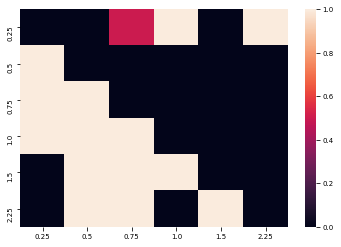

In [5]:
display(reinforce.task.dframe)
display(reinforce.task.complementary)
display(reinforce.df_finale)
sbn.heatmap(reinforce.df_finale)

In [12]:
actor_rewards = torch.load("models/actor_rewards.pt")
errors = torch.load("models/actor_errors.pt")
critic_losses = torch.load("models/critic_loss.pt")

Text(0.5, 1.0, 'Critic loss')

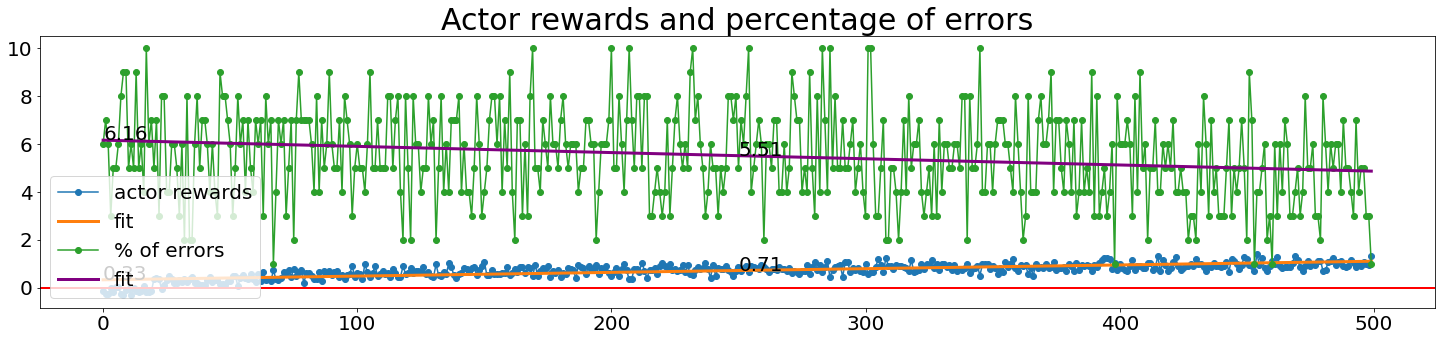

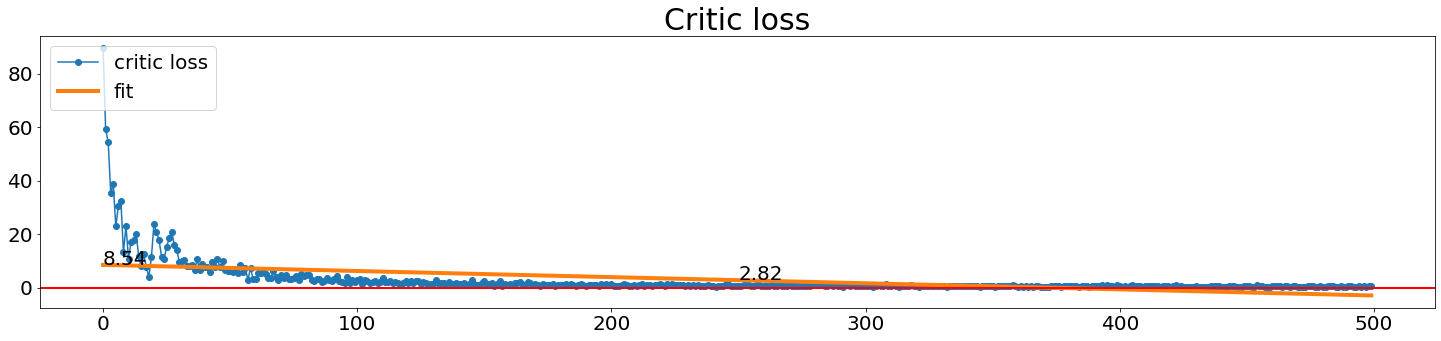

In [13]:
plt.figure(figsize=(25,5))

length = np.linspace(0, len(critic_losses)-1, len(critic_losses))
fit = np.polyfit(length, actor_rewards, 1)
fit2 = np.polyfit(length, errors, 1)

plt.plot(length, actor_rewards, "-o", label="actor rewards")
plt.plot(length, fit[1]+length*fit[0], "-", linewidth=3, label="fit")
plt.plot(length, errors, "-o", label="% of errors")
plt.plot(length, fit2[1]+length*fit2[0], "-", linewidth=3, label="fit", color="purple")
plt.axhline(0, linewidth=2, color="red")

for i in range(int(len(critic_losses)/250)):
    plt.text(length[250*i], fit2[1]+length[250*i]*fit2[0], str(round(fit2[1]+length[250*i]*fit2[0], 2)), fontsize=20, color="black")
    
for i in range(int(len(critic_losses)/250)):
    plt.text(length[250*i], fit[1]+length[250*i]*fit[0], str(round(fit[1]+length[250*i]*fit[0], 2)), fontsize=20, color="black")
    
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=20, loc="lower left")
plt.title("Actor rewards and percentage of errors", fontsize=30)

#==========================================================================================================================================

#plt.figure(figsize=(25,5))
#
#length_b = np.linspace(0, len(critic_losses[3000:])-1, len(critic_losses[3000:]))
#fit1_b = np.polyfit(length_b, actor_rewards[3000:], 1)
#fit2_b = np.polyfit(length_b, errors[3000:], 1)
#
#plt.plot(length_b, actor_rewards[3000:], "-o", label="actor rewards")
#plt.plot(length_b, fit1_b[1]+length_b*fit1_b[0], "-", linewidth=4, label="fit")
#plt.plot(length_b, errors[3000:], "-o", label="% of errors")
#plt.plot(length_b, fit2_b[1]+length_b*fit2_b[0], "-", linewidth=4, label="fit", color="purple")
#plt.axhline(0, linewidth=2, color="red")
#
#for i in range(int(len(length_b)/200)):
#    plt.text(length_b[200*i], fit1_b[1]+length_b[200*i]*fit1_b[0], str(round(fit1_b[1]+length_b[200*i]*fit1_b[0], 2)), fontsize=20, color="black")
#
#for i in range(int(len(length_b)/200)):
#    plt.text(length_b[200*i], fit2_b[1]+length_b[200*i]*fit2_b[0], str(round(fit2_b[1]+length_b[200*i]*fit2_b[0], 2)), fontsize=20, color="black")
#
#plt.xticks(size=20)
#plt.yticks(size=20)
#plt.legend(fontsize=20, loc="upper left")
#plt.title("Zoom on actor rewards and percentage of errors", fontsize=30)
#
#==========================================================================================================================================

plt.figure(figsize=(25,5))
    
fit3 = np.polyfit(length, critic_losses, 1)

plt.plot(length, critic_losses, "-o", label="critic loss")
plt.plot(length, fit3[1]+length*fit3[0], "-", linewidth=4, label="fit")
plt.axhline(0, linewidth=2, color="red")

for i in range(int(len(length)/250)):
    plt.text(length[250*i], fit3[1]+length[250*i]*fit3[0], str(round(fit3[1]+length[250*i]*fit3[0], 2)), fontsize=20, color="black")

plt.xticks(size=20)
plt.yticks(size=20)
#plt.ylim(0,0.5)
plt.legend(fontsize=20, loc="upper left")
plt.title("Critic loss", fontsize=30);

#==========================================================================================================================================

#plt.figure(figsize=(25,5))
#    
#fit3_b = np.polyfit(length_b, critic_losses[3000:], 1)
#
#plt.plot(length_b, critic_losses[3000:], "-o", label="critic loss")
#plt.plot(length_b, fit3_b[1]+length_b*fit3_b[0], "-", linewidth=4, label="fit")
#plt.axhline(0, linewidth=2, color="red")
#
#for i in range(int(len(length_b)/200)):
#    plt.text(length_b[200*i], fit3_b[1]+length_b[200*i]*fit3_b[0], str(round(fit3_b[1]+length_b[200*i]*fit3_b[0], 2)), fontsize=20, color="black")
#
#plt.xticks(size=20)
#plt.yticks(size=20)
##plt.ylim(0,0.5)
#plt.legend(fontsize=20, loc="upper left")
#plt.title("Zoom on critic loss", fontsize=30);

In [16]:
reinforce = rln.REINFORCE(name_load_actor="models/RL_actor_network.pt",
                          name_load_critic="models/RL_critic_network.pt")

In [17]:
iterations = 100 
observations, rewards, actions, log_probs, entropies, values,\
trial_begins, errors = reinforce.experience(iterations)
print (len(errors), errors+1)

iteration 100


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0,0.0,0.0
2.25,0.0,0.0,0.0,0.0,0.0,0.0


,0.25,0.5,0.75,1.0,1.5,2.25
0.25,0.0,0.0,0.0,0.0,0.0,0.0
0.5,0.0,0.0,0.0,0.0,0.0,0.0
0.75,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0
1.5,0.0,0.0,0.0,0.0,0.0,0.0
2.25,0.0,0.0,0.0,0.0,0.0,0.0


33 [ 2  5  7 17 19 24 25 27 32 33 37 42 43 45 47 49 50 52 57 61 65 66 67 72
 75 79 83 87 88 89 92 93 99]


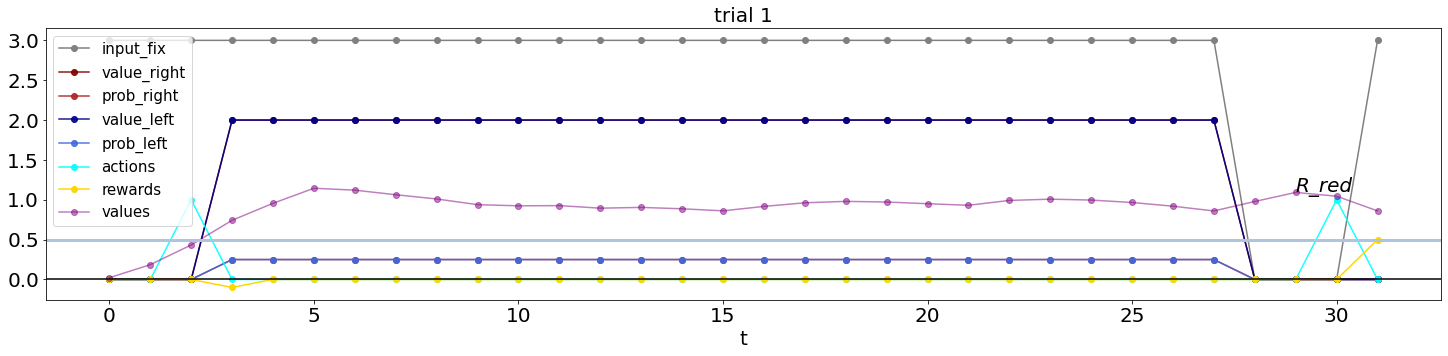

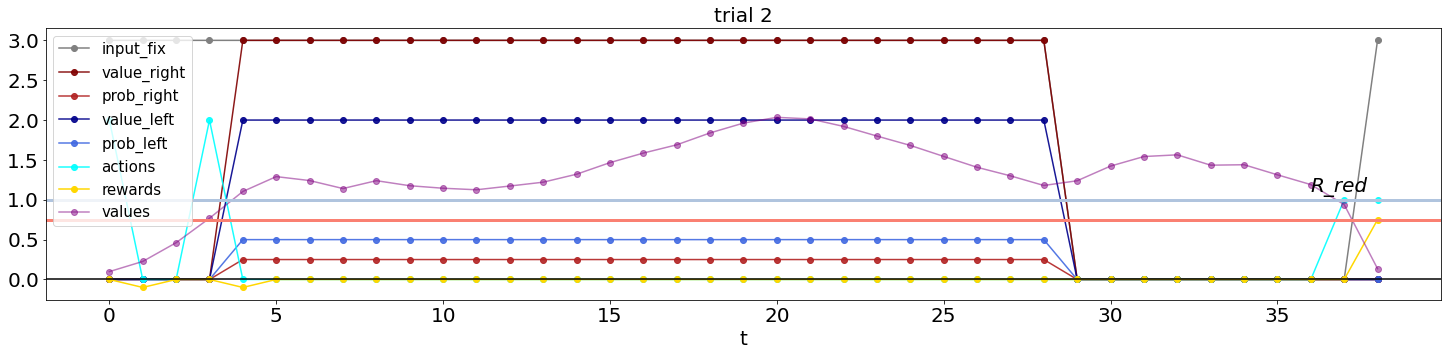

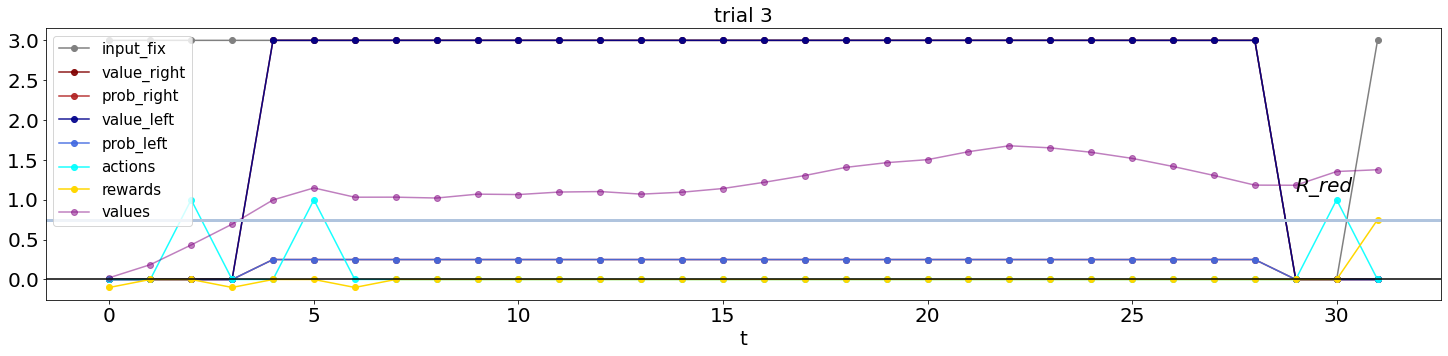

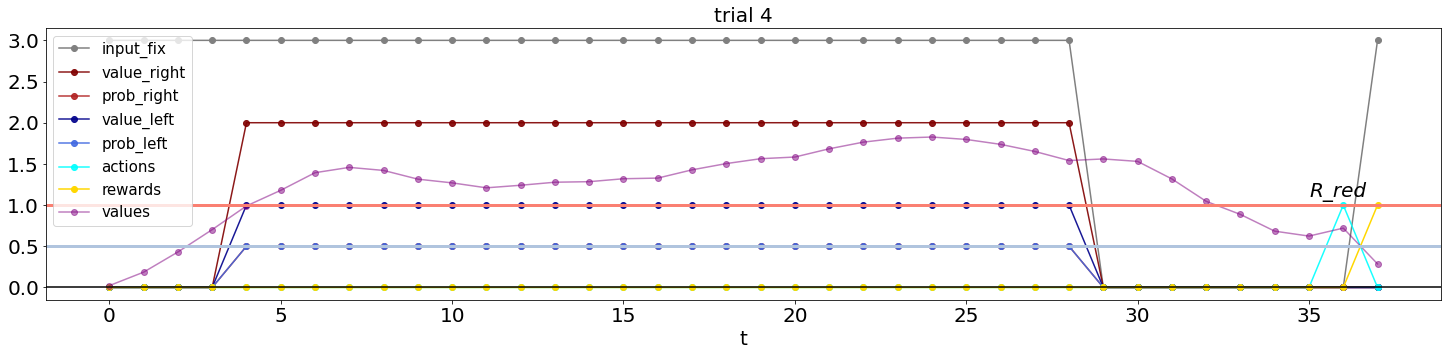

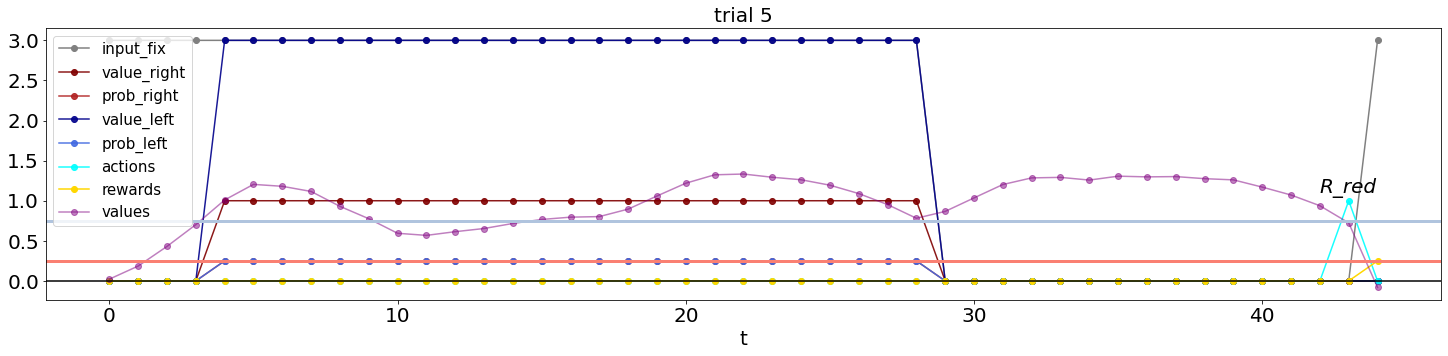

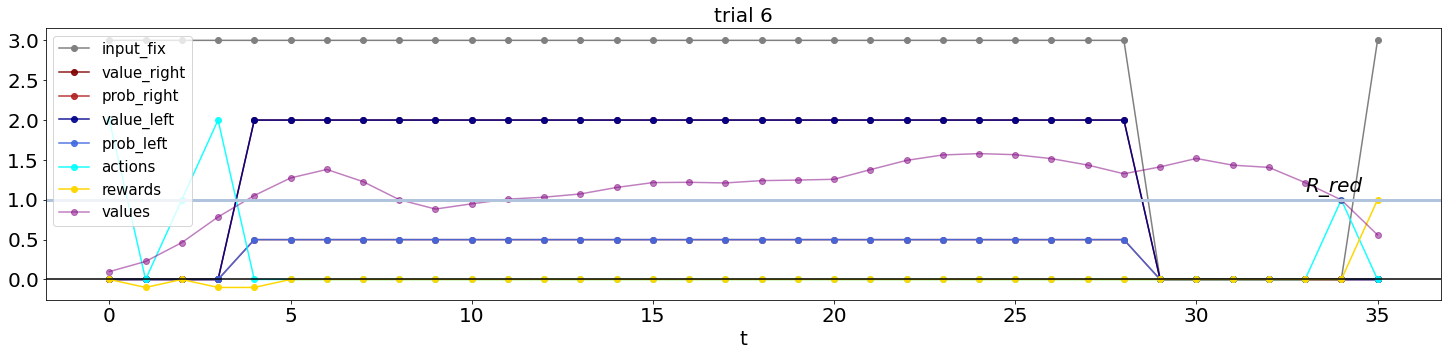

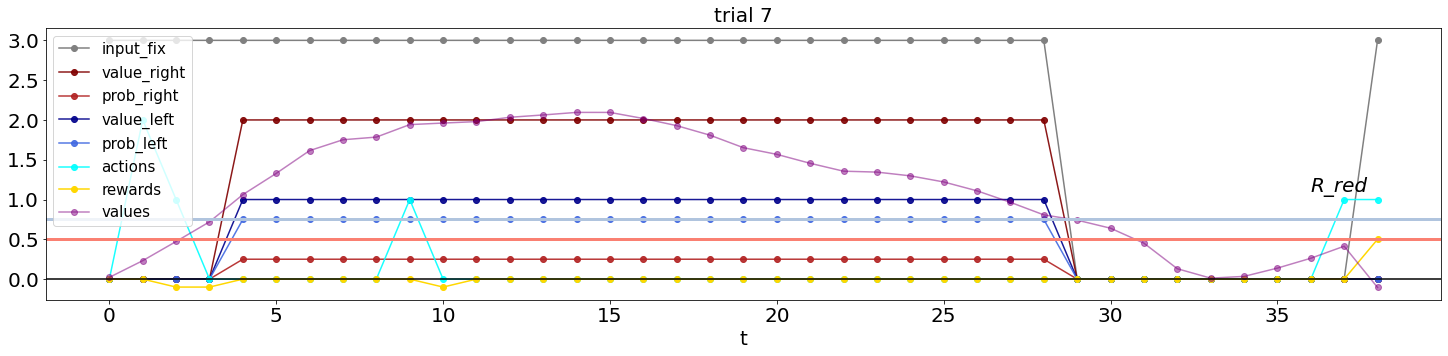

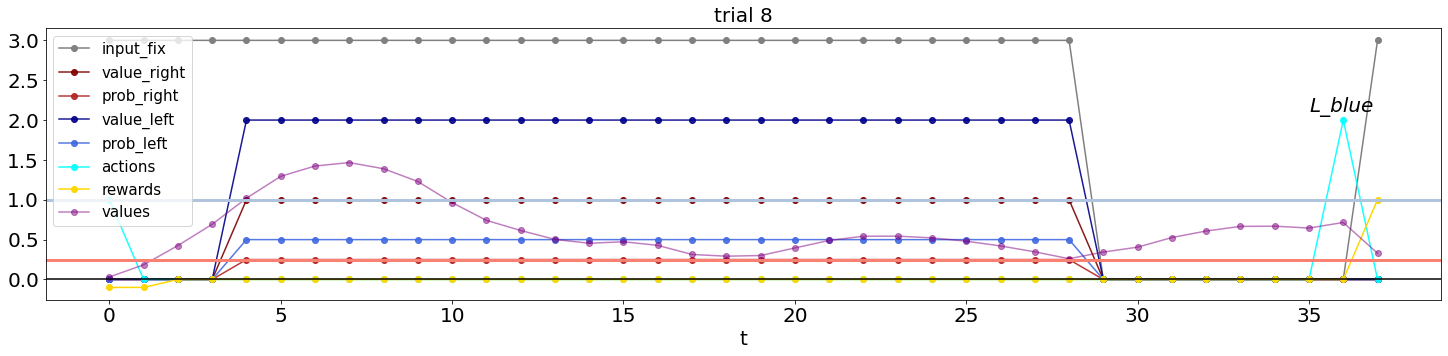

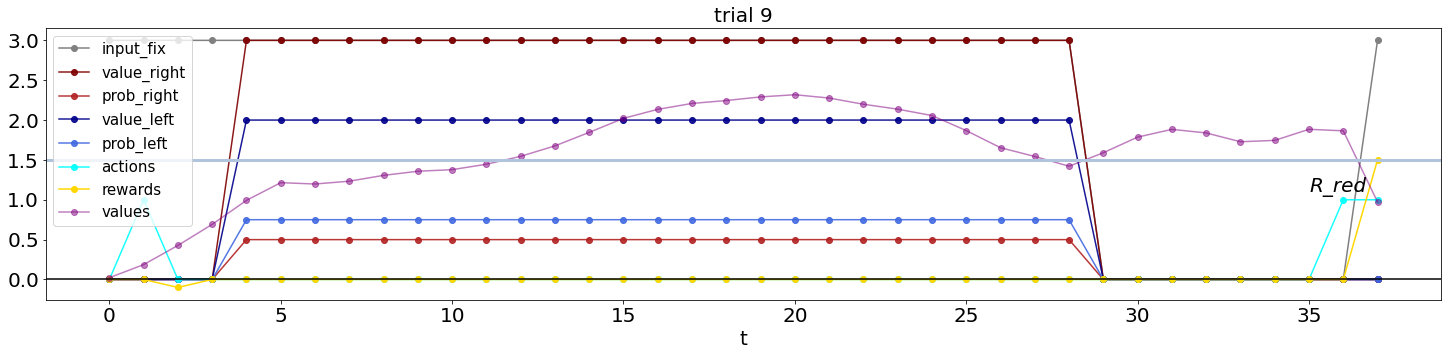

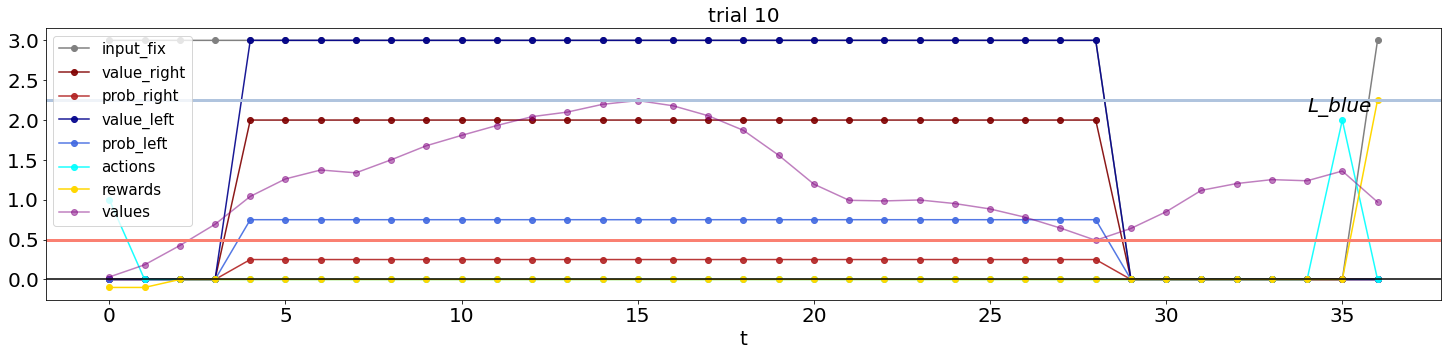

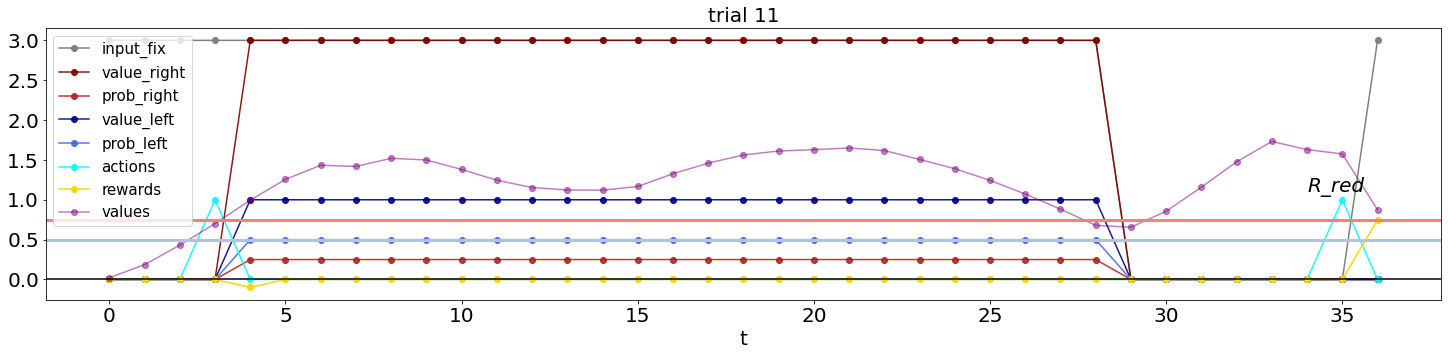

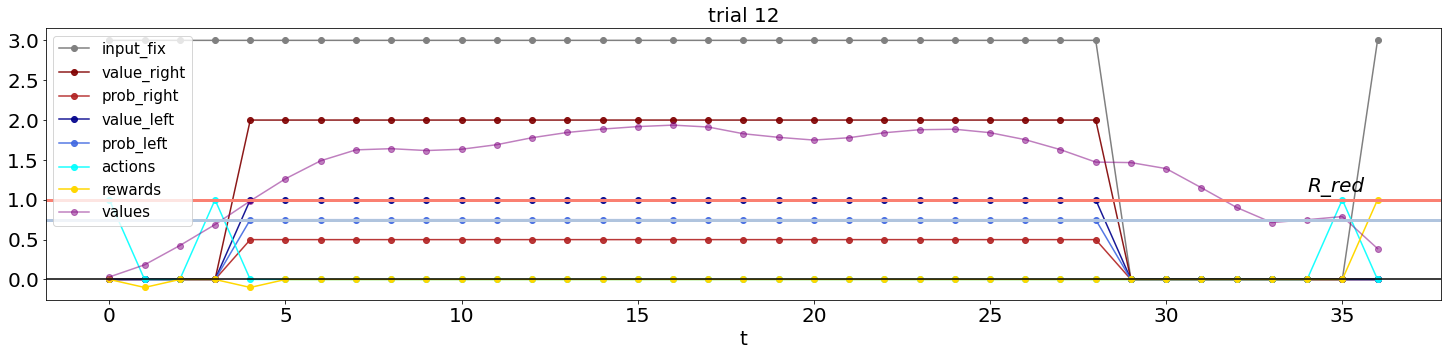

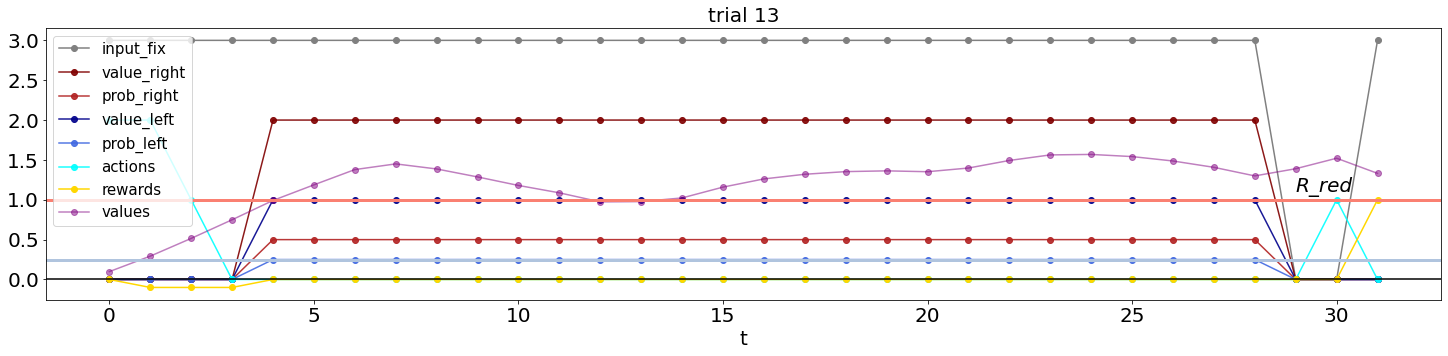

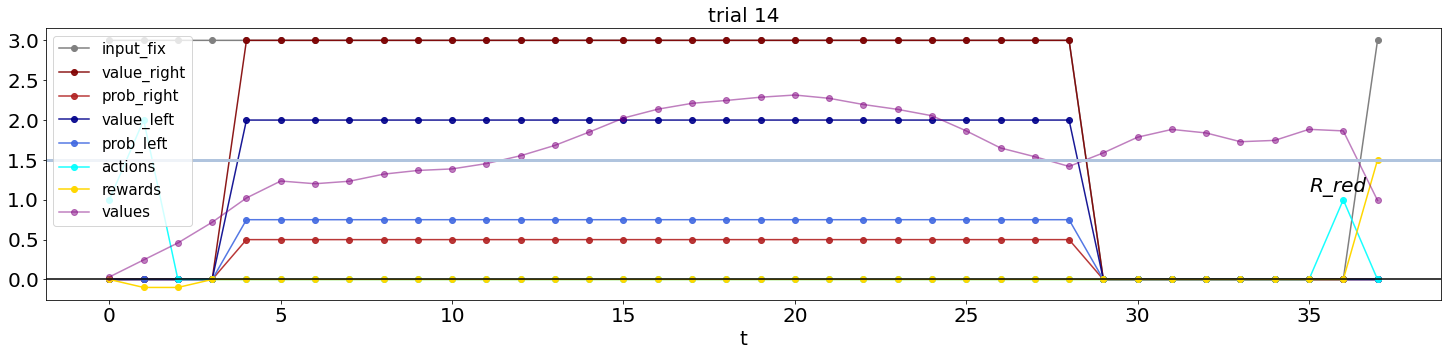

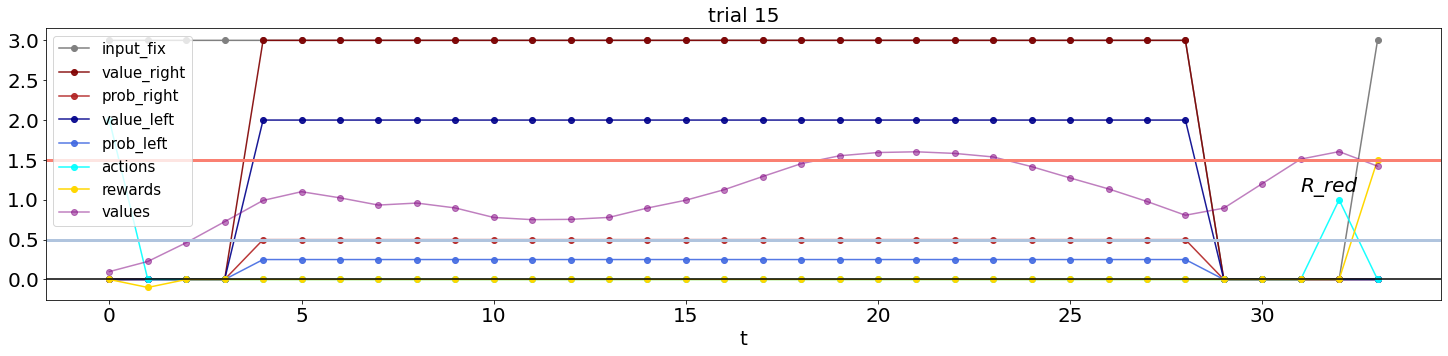

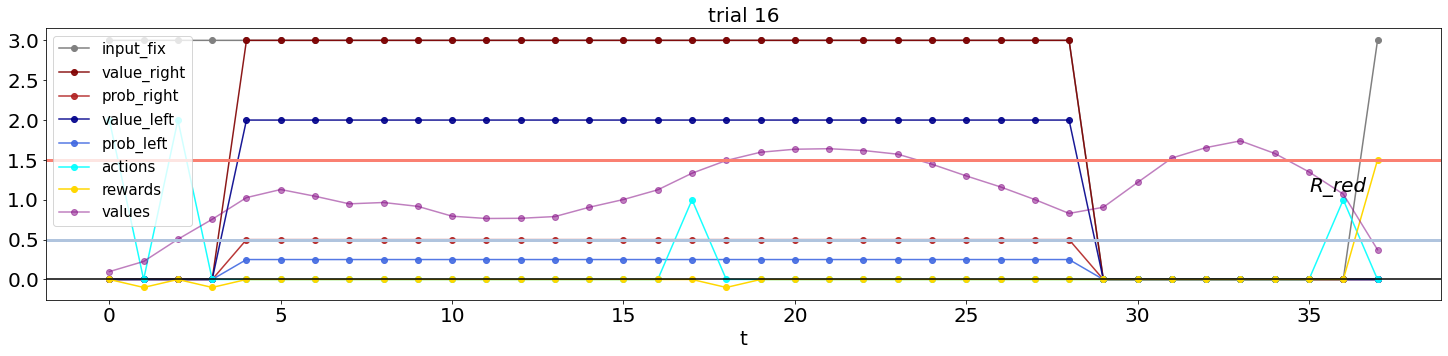

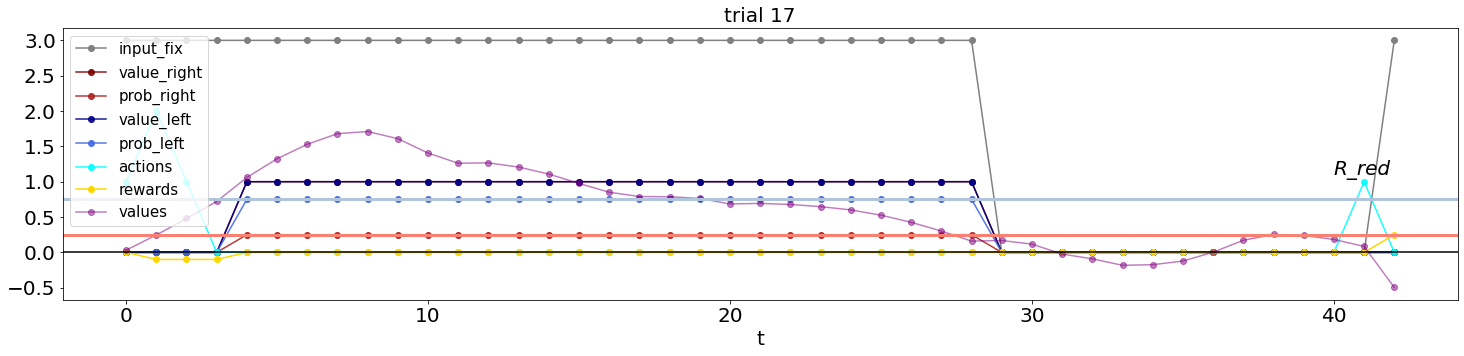

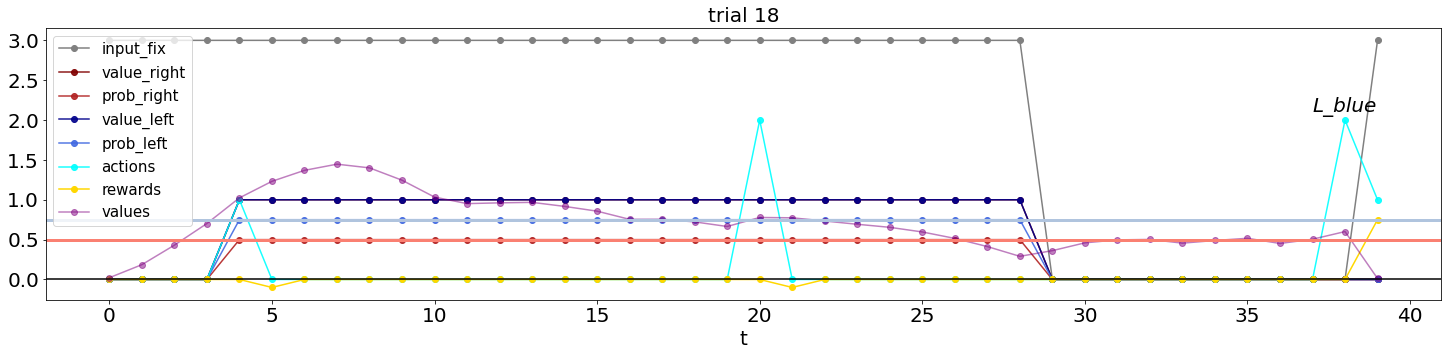

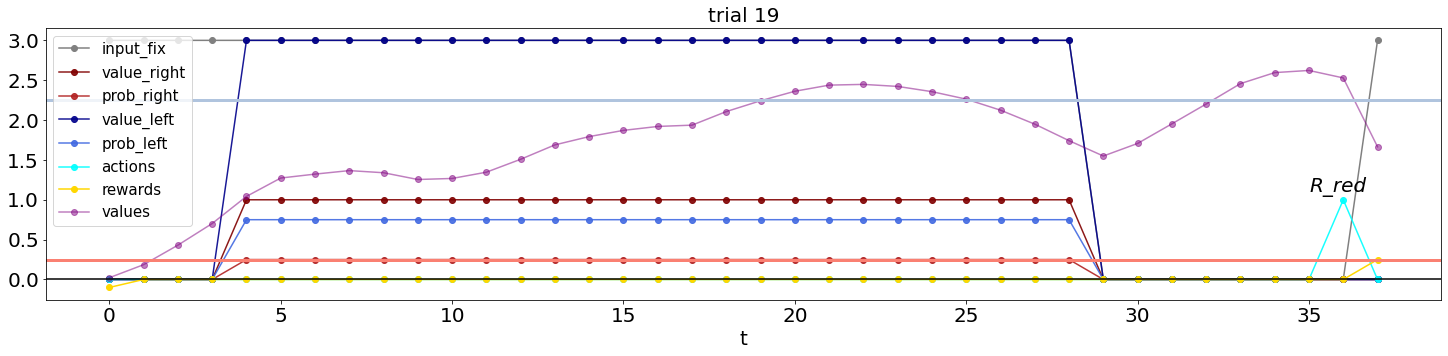

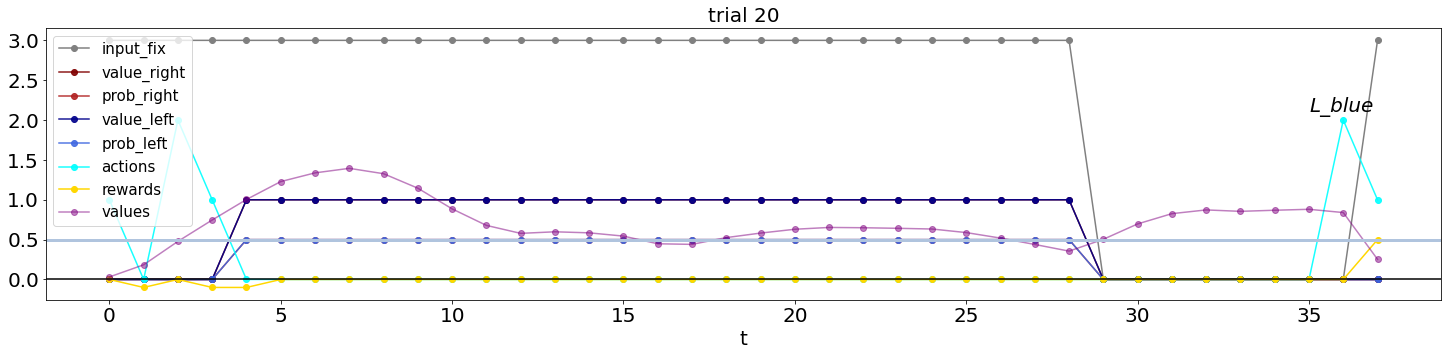

In [18]:
obs = np.asarray(observations).T
length = 0
for i in range(20):

    plt.figure(figsize=(25,5))

    start = int(trial_begins[i])
    stop = int(trial_begins[i+1])

    plt.plot(obs[0][start:stop], "-o", label="input_fix", color="gray")
    plt.plot(obs[1][start:stop], "-o", label="value_right", color="maroon", alpha=0.9)
    plt.plot(obs[2][start:stop], "-o", label="prob_right", color="firebrick", alpha=0.9)
    plt.plot(obs[3][start:stop], "-o", label="value_left", color="darkblue", alpha=0.9)
    plt.plot(obs[4][start:stop], "-o", label="prob_left", color="royalblue", alpha=0.9)
    plt.plot(actions[start:stop], "-o", label="actions", color="cyan", alpha=0.9)
    plt.plot(rewards[start:stop], "-o", label="rewards", color="gold", alpha=1)
    #plt.plot(cum_rho[start:stop], "-o", label="cum_rho", color="cyan", alpha=0.5)
    plt.plot(values.clone().detach().numpy()[start:stop], "-o", label="values", color="purple", alpha=0.5)
    #plt.plot(stop-length-2, gt[i], "*", markersize=25, color="orange")
    plt.axhline(0, color="black")
    plt.axhline(obs[1][start+10]*obs[2][start+10], color="salmon", linewidth=3)
    plt.axhline(obs[3][start+10]*obs[4][start+10], color="lightsteelblue", linewidth=3)
    length += len(obs[0][start:stop])

    plt.xlabel("t", size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.title("trial %i" %(i+1), size=20)
    if actions[start:stop][-2] == 1:
        plt.text(len(actions[start:stop])-3, 1.1, 'R_red', style='italic', fontsize=20)
    elif actions[start:stop][-2] == 2:
        plt.text(len(actions[start:stop])-3, 2.1, 'L_blue', style='italic', fontsize=20)
    plt.legend(fontsize=15, loc="upper left");